In [1]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.utils.np_utils import to_categorical
from keras import backend as K
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# split the train and validataion dataset
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# normalization
x_train = x_train.astype('float32')/255
x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [3]:
x_train.shape, x_valid.shape, x_test.shape

((54000, 28, 28), (6000, 28, 28), (10000, 28, 28))

In [4]:
y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Text(0.5, 1.0, '6')

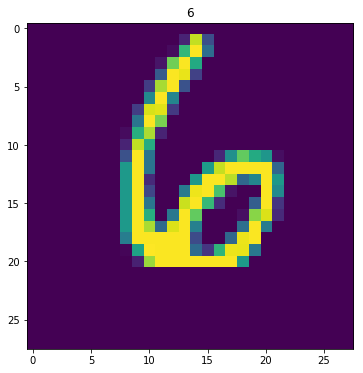

In [5]:
# show a smaple of train
plt.figure(figsize=(6, 6))
plt.imshow(x_train[1])
plt.title(y_train[1].argmax())

In [6]:
# build model
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64, (3,3), strides=(1,1), name='layer_conv1', padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool1')(x)

x = Conv2D(64, (3,3), strides=(1,1), name='layer_conv2', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool2')(x)

x = Conv2D(32, (3,3),strides =(1,1), name='conv3', padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64, activation = 'relu', name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32, activation = 'relu', name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation = 'softmax', name='fc2')(x)

model = Model(inputs = input, outputs = x, name='Predict')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [8]:
# data shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_valid = x_valid.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
x_train.shape, x_valid.shape, x_test.shape

((54000, 28, 28, 1), (6000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 
    horizontal_flip=True) # randomly flip images horizontally
# fit augmented image generator on data
datagen_train.fit(x_train)

In [11]:
# optimizer
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
# trainning
history = model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=32), 
                              validation_data=(x_valid, y_valid),
                              steps_per_epoch=x_train.shape[0],
                              epochs=1
                             )

Epoch 1/1
54000/54000 [==============================] - 4715s 87ms/step - loss: 0.1336 - acc: 0.9691 - val_loss: 0.1087 - val_acc: 0.9797
